In [1]:
import random
import matplotlib.pyplot as plt
import numpy as np
import array
import math
from scipy import signal

signal generation

In [2]:
sig1 = array.array('f')
sig2 = array.array('f')
for i in range(0,25000000):
    rand1 = random.randint(0,3)-1.5
    rand2 = random.randint(0,3)-1.5
    for j in range(0,10):
        sig1.append(rand1)
    for k in range(0,10):
        sig2.append(rand2)

length1 = len(sig1)
length2 = len(sig2)
print(length1)
print(length2)
if length1 > length2:
    length = length2
else:
    length = length1
print(length)

250000000
250000000
250000000


Lowpass filtering

In [3]:
b,a = signal.butter(2,0.16,'lowpass')
y1 = signal.filtfilt(b,a,sig1)
y2 = signal.filtfilt(b,a,sig2)

eye diagram of the original data

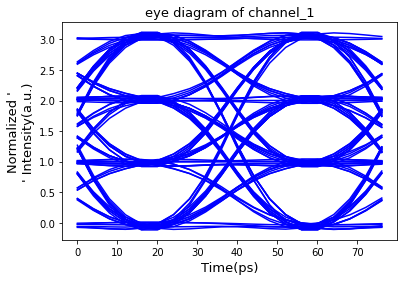

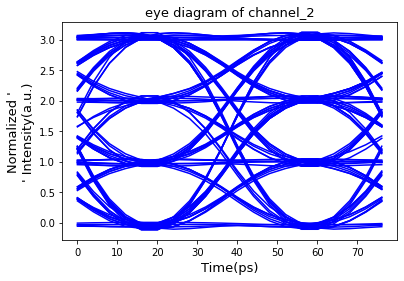

In [112]:
x = np.linspace(0,1999,500)
xx = np.linspace(1,length,length)
for i in range(100):
    y=[]
    for j in range(20):
        y.append(y1[(i)*20+j]+1.5)
    plt.plot(x[:20],y,'b')
plt.xlabel("Time(ps)",fontsize=13)
plt.ylabel("Normalized '\n' Intensity(a.u.)",fontsize=13)
plt.title('eye diagram of channel_1',fontsize=13)
plt.show()
for i in range(100):
    y=[]
    for j in range(20):
        y.append(y2[(i)*20+j]+1.5)
    plt.plot(x[:20],y,'b')
plt.xlabel("Time(ps)",fontsize=13)
plt.ylabel("Normalized '\n' Intensity(a.u.)",fontsize=13)
plt.title('eye diagram of channel_2',fontsize=13)
plt.show()

original waveform

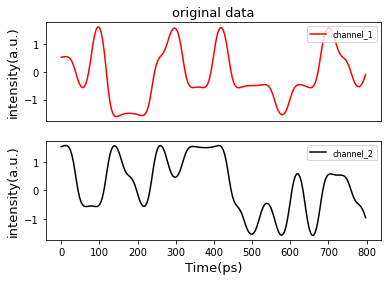

In [5]:
plt.subplot(2,1,1)
plt.plot(x[:200],y1[:200],'r')
plt.ylabel("intensity(a.u.)",fontsize = 13)
plt.legend(["channel_1"],fontsize=8,loc=1)
plt.title("original data",fontsize=13)
plt.xticks([])

plt.subplot(2,1,2)
plt.plot(x[:200],y2[:200],'k')
plt.xlabel("Time(ps)",fontsize=13)
plt.ylabel("intensity(a.u.)",fontsize=13)
plt.legend(["channel_2"],fontsize=8,loc = 1)
plt.show()

transmission matrix

In [27]:
a = 0.83
b = 0.24
c = 0.17
d = 0.76

In [28]:
Y3=[]
Y4=[]
for i in range(0,length//201):
    Y3.append((a+0.005*math.sin(xx[i]*math.pi/1000))*y1[201*i]+(b+0.005*math.cos(xx[i]*math.pi/1000))*y2[201*i])
    Y4.append((c-0.005*math.cos(xx[i]*math.pi/1000))*y1[201*i]+(d-0.005*math.sin(xx[i]*math.pi/1000))*y2[201*i])

set bytes in a group

In [95]:
count = 0
groupnumber = 10000

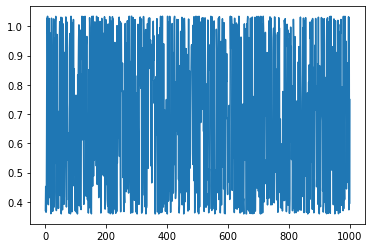

1.0341899523244371
0.7750186878060927
0.6319383146726604


In [31]:
count = 1
W_1 = []
W_2 = []
Varr = []
for i in range(1000):
    middle_1 = random.randint(0,200)/100 - 1
    middle_2 = random.randint(0,200)/100 - 1
    W_1.append(middle_1/((middle_1)**2+(middle_2)**2)**0.5)
    W_2.append(middle_2/((middle_1)**2+(middle_2)**2)**0.5)
    to = [W_1[i]*j+W_2[i]*k for j,k in zip(Y3[groupnumber*(count-1):groupnumber*count],\
                                         Y4[groupnumber*(count-1):groupnumber*count])]
    Varr.append(np.var(to))
x_test = np.linspace(1,1000,1000)
plt.plot(x_test,Varr)
plt.show()
print(max(Varr))
print(W_1[Varr.index(max(Varr))])
print(W_2[Varr.index(max(Varr))])

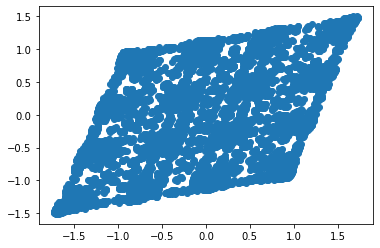

In [32]:
plt.plot(Y3[groupnumber*(count-1):groupnumber*count],Y4[groupnumber*(count-1):groupnumber*count],linestyle='none',marker='o')
plt.show()

function of variance and kurtosis

In [96]:
def f_vork(W_1,W_2,m1,channel,y3=Y3,y4=Y4):
    global count
    global groupnumber
    count = count + 1
    if m1 == 1:
        to = [W_1*j+W_2*k for j,k in zip(y3[groupnumber*(count-1):groupnumber*count],\
                                         y4[groupnumber*(count-1):groupnumber*count])]
        return np.var(to)
    elif m1 == 2:
        v = copy()
        Y33 = list([v[0]*j+v[1]*k for j,k in zip(y3[groupnumber*(count-1):groupnumber*count],\
                                                 y4[groupnumber*(count-1):groupnumber*count])])
        Y44 = list([v[2]*j+v[3]*k for j,k in zip(y3[groupnumber*(count-1):groupnumber*count],\
                                                 y4[groupnumber*(count-1):groupnumber*count])])
        #if channel == 1:
            #WV_1 = 0.8 + 0.2*W_1/(abs(W_1)+abs(W_2))
            #WV_2 = 0.2*W_2/(abs(W_1)+abs(W_2))
        #if channel == 2:
            #WV_1 = 0.2*W_1/(abs(W_1)+abs(W_2))
            #WV_2 = 0.8 + 0.2*W_2/(abs(W_1)+abs(W_2))
        WV_1 = W_1
        WV_2 = W_2
        to = list([WV_1*j+WV_2*k for j,k in zip(Y33[0:groupnumber], Y44[0:groupnumber])])
        Me = np.mean(to)
        A = 0
        for i in range(0,groupnumber):
            A = A + (to[i]-Me)**4
        return abs(A/groupnumber/(np.var(to)**2)-3)

set the initial weight of PCA

In [97]:
W1 = []
W2 = []
fw = []
N = 3
for i in range(0,N):
    middle1 = (random.randint(0,200)-100) / 100
    middle2 = (random.randint(0,200)-100) / 100
    W1.append(round(middle1 / ((middle1)**2+(middle2)**2)**0.5,3))
    W2.append(round(middle2 / ((middle1)**2+(middle2)**2)**0.5,3))
    print(W1[i])
    print(W2[i])
    fw.append(f_vork(W1[i],W2[i],1,1))

0.574
-0.819
-0.464
0.886
0.337
0.942


function of searching the best weight

In [98]:
def search_weight(w1,w2,f,n,m2,channel):
    frecord1 = []
    frecord2 = []
    if m2 == 1:
        t = 0.02
    if m2 == 2:
        t = 0.02
    B = 1
    r = 2
    p = 0.5
    s = 0.5
    fmax = max(f)
    w1max = w1[f.index(fmax)]
    w2max = w2[f.index(fmax)]
    fmin = min(f)
    w1min = w1[f.index(fmin)]
    w2min = w2[f.index(fmin)]
    print(fmax)
    print(fmin)
    number = 0
    Z = []
    while (fmax-fmin > t or number < 15) and number < 100:
        number += 1
        Z.append(number)
        if m2 == 1:
            w1cen = (sum(w1) - w1min)/(n-1)
            w2cen = (sum(w2) - w2min)/(n-1)
        elif m2 == 2:
            w1cen = sum(w1)/n
            w2cen = sum(w2)/n
        w1ref = (w1cen + B*(w1cen - w1min)) / ((w1cen + B*(w1cen - w1min))**2 + (w2cen + B*(w2cen - w2min))**2)**0.5
        w2ref = (w2cen + B*(w2cen - w2min)) / ((w1cen + B*(w1cen - w1min))**2 + (w2cen + B*(w2cen - w2min))**2)**0.5
        fref = f_vork(w1ref,w2ref,m2,channel)
        if fmin <fref < fmax:
            w1[w1.index(w1min)] = w1ref
            w2[w2.index(w2min)] = w2ref
            f[f.index(fmin)] = fref
            fmin = min(f)
            w1min = w1[f.index(fmin)]
            w2min = w2[f.index(fmin)]
        elif fref >= fmax:
            w1exp = (w1cen+r*(w1ref-w1cen)) / ((w1cen+r*(w1ref-w1cen))**2 + (w2cen+r*(w2ref-w2cen))**2)**0.5
            w2exp = (w2cen+r*(w2ref-w2cen)) / ((w1cen+r*(w1ref-w1cen))**2 + (w2cen+r*(w2ref-w2cen))**2)**0.5
            fexp = f_vork(w1exp,w2exp,m2,channel)
            if fref < fexp:
                w1[w1.index(w1min)] = w1exp
                w2[w2.index(w2min)] = w2exp
                f[f.index(fmin)] = fexp
                fmax = fexp
                w1max = w1[f.index(fmax)]
                w2max = w2[f.index(fmax)]
                
                fmin = min(f)
                w1min = w1[f.index(fmin)]
                w2min = w2[f.index(fmin)]
                
            elif fexp <= fref:
                w1[w1.index(w1min)] = w1ref
                w2[w2.index(w2min)] = w2ref 
                f[f.index(fmin)] = fref
                fmax = fref
                w1max = w1[f.index(fmax)]
                w2max = w2[f.index(fmax)]
                
                fmin = min(f)
                w1min = w1[f.index(fmin)]
                w2min = w2[f.index(fmin)]
                
                if fmin < fexp:           
                    w1[w1.index(w1min)] = w1exp
                    w2[w2.index(w2min)] = w2exp
                    f[f.index(fmin)] = fexp
                    fmin = min(f)
                    w1min = w1[f.index(fmin)]
                    w2min = w2[f.index(fmin)]
        elif fref <= fmin:
            w1con = (w1cen+p*(w1min-w1cen)) / ((w1cen+p*(w1min-w1cen))**2 + (w2cen+p*(w2min-w2cen))**2)**0.5
            w2con = (w2cen+p*(w2min-w2cen)) / ((w1cen+p*(w1min-w1cen))**2 + (w2cen+p*(w2min-w2cen))**2)**0.5
            fcon = f_vork(w1con,w2con,m2,channel)
            if fmin < fcon < fmax:
                w1[w1.index(w1min)] = w1con
                w2[w2.index(w2min)] = w2con
                f[f.index(fmin)] = fcon
                fmin = min(f)
                w1min = w1[f.index(fmin)]
                w2min = w2[f.index(fmin)]
            elif fcon > fmax:
                w1[w1.index(w1min)] = w1con
                w2[w2.index(w2min)] = w2con 
                f[f.index(fmin)] = fcon
                fmax = max(f)
                w1max = w1[f.index(fmax)]
                w2max = w2[f.index(fmax)]
                fmin = min(f)
                w1min = w1[f.index(fmin)]
                w2min = w2[f.index(fmin)]
            else:
                w111 = []
                w222 = []
                w11 = []
                w22 = []
                fww = []
                for i in range(0,n-1):
                    w111.append(w1max+s*(w1[i]-w1max)) 
                    w222.append(w2max+s*(w2[i]-w2max))
                    w11.append(w111[i]/((w111[i])**2+(w222[i])**2)**0.5)
                    w22.append(w222[i]/((w111[i])**2+(w222[i])**2)**0.5)
                    fww.append(f_vork(w11[i],w22[i],m2,channel))
                fww = fww + f
                w11 = w11 + w1
                w22 = w22 + w2
                f_sort = sorted(fww)
                
                f[0] = fmax = f_sort[2*n - 2]
                w1[0] = w1max = w11[fww.index(f_sort[2*n - 2])]
                w2[0] = w2max = w22[fww.index(f_sort[2*n - 2])]
                
                f[1] = f_sort[2*n - 3]
                w1[1] = w11[fww.index(f_sort[2*n - 3])]
                w2[1] = w22[fww.index(f_sort[2*n - 3])]
                
                f[2] = fmin = f_sort[2*n - 4]
                w1[2] = w1min = w11[fww.index(f_sort[2*n - 4])]
                w2[2] = w2min = w22[fww.index(f_sort[2*n - 4])]                    
            
                
        frecord1.append(fmax)
        frecord2.append(fmin)
    plt.plot(Z,frecord1,'r',marker='o')
    plt.plot(Z,frecord2,'k',marker='o')
    plt.xlabel('Iterations',fontsize=18)
    if m2 == 1:
        plt.ylabel('variance',fontsize=18)
        plt.legend(['Var_max','Var_min'],fontsize=13,loc= 4)
    else:
        plt.ylabel('kurtosis',fontsize=18)
        plt.legend(['Kurt_max','Kurt_min'],fontsize=13,loc=4)
    if channel > 0:
        plt.title('convergence of channel_'+str(channel),fontsize=18)
    else:
        plt.title('convergence of channel',fontsize=18)
    
    plt.show()
    print(fmax)
    print(fmin)
    print(number)
    if channel == 0:
        #return 0.8 + 0.2*w1max,0.2*w2max
        return w1max,w2max
    else:
        return w1max,w2max

get the whiting matrix through PCA

0.8671810975930592
0.36254777487244794


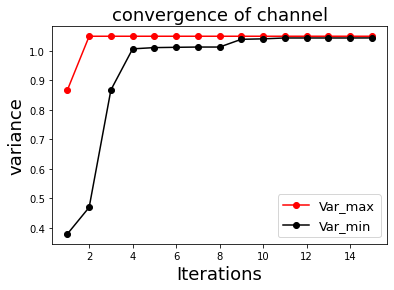

1.0490973219286774
1.0433797756353649
15


In [99]:
e11 = search_weight(W1,W2,fw,N,1,0)
e1 = e11
e2 = (-e11[1],e11[0])
ff1 = []
ff2 = []
for i in range(0,groupnumber):
    ff1.append(e1[0]*Y3[groupnumber*(count-1)+i] + e1[1]*Y4[groupnumber*(count-1)+i])
    ff2.append(e2[0]*Y3[groupnumber*(count-1)+i] + e2[1]*Y4[groupnumber*(count-1)+i])
f1 = np.var(ff1)
f2 = np.var(ff2)
#weight matrix
V11 = e1[0]*e1[0]*(f1**(-0.5)) + e2[0]*e2[0]*(f2**(-0.5))
V12 = e1[0]*e1[1]*(f1**(-0.5)) + e2[0]*e2[1]*(f2**(-0.5))
V21 = e1[0]*e1[1]*(f1**(-0.5)) + e2[0]*e2[1]*(f2**(-0.5))
V22 = e1[1]*e1[1]*(f1**(-0.5)) + e2[1]*e2[1]*(f2**(-0.5))
count2 = count

In [100]:
print(e11)

(0.7430534922292504, 0.6692320282875851)


In [101]:
def copy(v11=V11,v12=V12,v21=V21,v22=V22):
    return v11,v12,v21,v22

In [102]:
print(V11*a+V12*c)
print(V11*b+V12*d)
print(V21*a+V22*c)
print(V21*b+V22*d)

1.0091418601979787
0.04735146116276079
-0.05450263882680084
0.9498254598473811


Get the weight of first channel

1.1490158137656425
0.4942872291031706


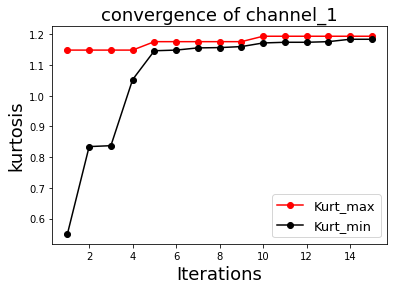

1.1941574578157343
1.1843045359015723
15


In [103]:
WW1 = []
WW2 = []
fww = []
for i in range(0,N):
    middle3 = (random.randint(0,200)-100) / 100
    middle4 = (random.randint(0,200)-100) / 100
    WW1.append(round(middle3 / ((middle3)**2 + (middle4)**2)**0.5,2))
    WW2.append(round(middle4 / ((middle3)**2 + (middle4)**2)**0.5,2))
    fww.append(f_vork(WW1[i],WW2[i],2,1))


E1 = search_weight(WW1,WW2,fww,N,2,1)


Get the weight of second channel

In [104]:
print(count)

73


In [105]:
print(E1)

(0.05229050679357223, 0.9986319156222034)


In [106]:
if abs(E1[0]) > abs(E1[1]):
    E11 = abs(E1[0])
    E12 = E1[0]*E1[1]/abs(E1[0])
    E21 = -E12
    E22 = E11
else:
    E21 = E1[0]*E1[1]/abs(E1[1])
    E22 = abs(E1[1])
    E11 = E22
    E12 = -E21


In [107]:
print(E11)
print(E12)

0.9986319156222034
-0.05229050679357223


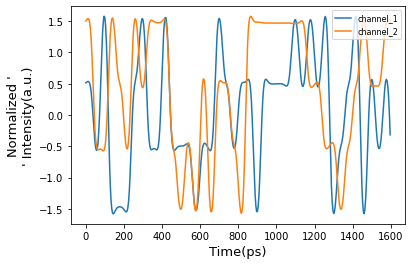

In [108]:
x = np.linspace(0,19999,5000)
Y3test=[]
Y4test=[]
for i in range(0,5000):
    Y3test.append((a+0.005*math.sin(xx[i]*math.pi/20000))*y1[i]+(b+0.005*math.cos(xx[i]*math.pi/20000))*y2[i])
    Y4test.append((c-0.005*math.cos(xx[i]*math.pi/20000))*y1[i]+(d-0.005*math.sin(xx[i]*math.pi/20000))*y2[i])


Op1test = []
Op2test = []
Op1_abs_test = []
Op2_abs_test = []
for i in range(0,5000):
    Op1test.append(E11*(V11*Y3test[i]+V12*Y4test[i])+E12*(V21*Y3test[i]+V22*Y4test[i]))
    Op2test.append(E21*(V11*Y3test[i]+V12*Y4test[i])+E22*(V21*Y3test[i]+V22*Y4test[i]))
    #Op1_abs_test.append(abs(Op1test[i]))
    #Op2_abs_test.append(abs(Op2test[i]))
Op11test = []
Op22test = []
for i in range(0,5000):
    Op11test.append(Op1test[i]/max(Op1test)*1.6)
    Op22test.append(Op2test[i]/max(Op2test)*1.6)
plt.plot(x[:400],Op11test[:400])
#plt.plot(list(np.linspace(1,500,500)),y1[:500])
plt.plot(x[:400],Op22test[:400])
plt.xlabel("Time(ps)",fontsize=13)
plt.ylabel("Normalized '\n' Intensity(a.u.)",fontsize=13)
plt.legend(['channel_1','channel_2'],fontsize=8,loc=1)
#plt.plot(list(np.linspace(1,500,500)),y2[:500])
plt.show()

result: waveform

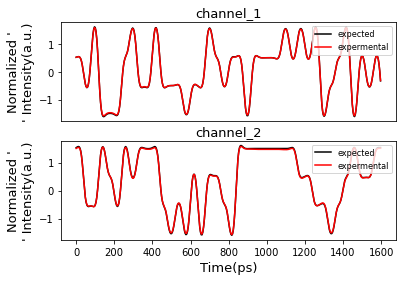

In [109]:
plt.subplot(2,1,1)
plt.plot(x[:400],y1[:400],'k')
#plt.plot(x[:500],Y3test[:500],'r')
plt.plot(x[:400],Op11test[:400],'r')
plt.ylabel("Normalized '\n' Intensity(a.u.)",fontsize=13)
plt.title('channel_1',fontsize=13)
plt.xticks([])

plt.legend(['expected','expermental'],fontsize=8,loc=1)


plt.subplot(2,1,2)
plt.plot(x[:400],y2[:400],'k')
#plt.plot(x[:500],Y4test[:500],'k')
plt.plot(x[:400],Op22test[:400],'r')
plt.xlabel("Time(ps)",fontsize=13)
plt.ylabel("Normalized '\n' Intensity(a.u.)",fontsize=13)
plt.title('channel_2',fontsize=13)


plt.legend(['expected','expermental'],fontsize=8,loc=1)

plt.show()

result: eye diagram

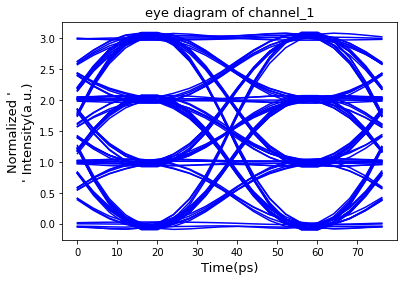

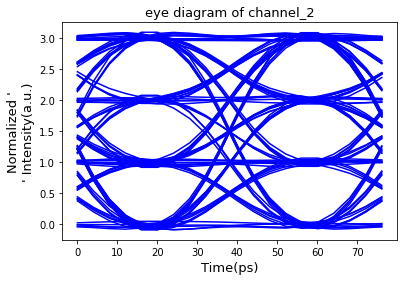

In [113]:
for i in range(100):
    y=[]
    for j in range(20):
        y.append(Op11test[(i+10)*20+j]+1.5)
    plt.plot(x[:20],y,'b')
plt.xlabel("Time(ps)",fontsize=13)
plt.ylabel("Normalized '\n' Intensity(a.u.)",fontsize=13)
plt.title('eye diagram of channel_1',fontsize=13)
plt.show()

for i in range(100):
    y=[]
    for j in range(20):
        y.append(Op22test[(i+10)*20+j]+1.5)
    plt.plot(x[:20],y,'b')
plt.xlabel("Time(ps)",fontsize=13)
plt.ylabel("Normalized '\n' Intensity(a.u.)",fontsize=13)
plt.title('eye diagram of channel_2',fontsize=13)
plt.show()

input data eye duagram

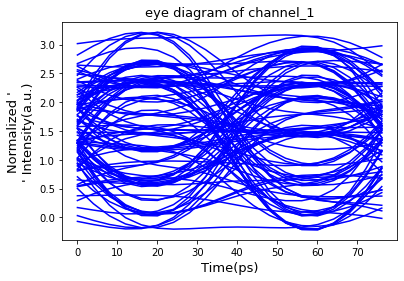

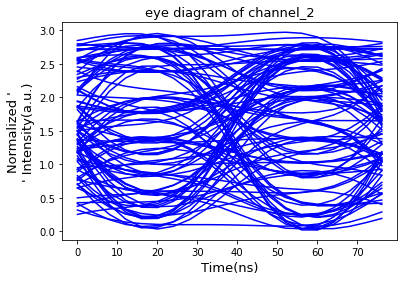

In [114]:
for i in range(100):
    y=[]
    for j in range(20):
        y.append(Y3test[(i+10)*20+j]+1.5)
    plt.plot(x[:20],y,'b')
plt.xlabel("Time(ps)",fontsize=13)
plt.ylabel("Normalized '\n' Intensity(a.u.)",fontsize=13)
plt.title('eye diagram of channel_1',fontsize=13)
plt.show()

for i in range(100):
    y=[]
    for j in range(20):
        y.append(Y4test[(i+10)*20+j]+1.5)
    plt.plot(x[:20],y,'b')
plt.xlabel("Time(ns)",fontsize=13)
plt.ylabel("Normalized '\n' Intensity(a.u.)",fontsize=13)
plt.title('eye diagram of channel_2',fontsize=13)
plt.show()